<a href="https://colab.research.google.com/github/Romit-Ghosh/Machine-Learning-/blob/main/PCA_on_Digit_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [7]:
# get more info of dataset
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
# Get the target values
print(digits['target_names'])

[0 1 2 3 4 5 6 7 8 9]


In [9]:
# get the column names
print(digits['feature_names'])

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [10]:
# store feature and target in variables
feature = digits.data
target = digits.target

In [11]:
feature

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df=pd.DataFrame(digits['data'],columns=digits['feature_names'])

In [15]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
df.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [18]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, target, train_size = 0.7, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 64)
(540, 64)
(1257,)
(540,)


**APPLYING PCA ALGORITHM**

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA(n_components=5)

In [22]:
x_pca=pca.fit_transform(df)

In [23]:
df.shape

(1797, 64)

In [24]:
x_pca.shape

(1797, 5)

In [25]:
x_pca

array([[ -1.25946611,  21.27488168,  -9.46305721,  13.01417204,
         -7.12894291],
       [  7.95761119, -20.76869759,   4.43950811, -14.89364713,
          5.89636815],
       [  6.99192286,  -9.95598629,   2.95855793, -12.28830351,
        -18.12616007],
       ...,
       [ 10.80128389,  -6.96025294,   5.59955353,  -7.22773682,
         -3.45970753],
       [ -4.87209935,  12.42395009, -10.17087131,  -6.66888004,
          3.56882798],
       [ -0.34438955,   6.36554853,  10.77370758,  -7.72622134,
         -3.31063287]])

In [26]:
explained_variance = np.var(x_pca, axis=0)
print(explained_variance)

[178.90731578 163.62664073 141.70953623 101.04411456  69.47448268]


In [27]:
explained_variance_ratio = explained_variance / np.sum(explained_variance)

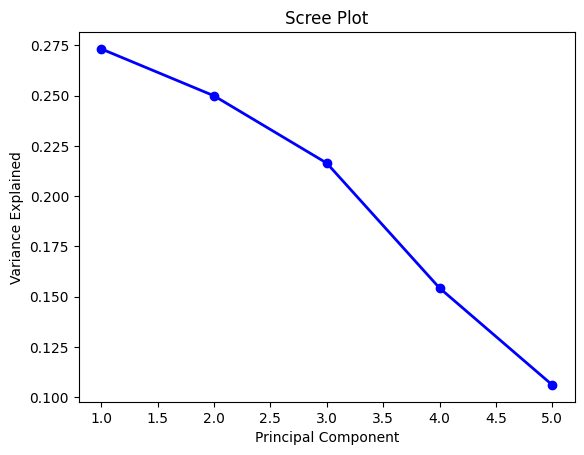

In [28]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, target, train_size = 0.7, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 5)
(540, 5)
(1257,)
(540,)


APPLY LOGISTIC REGRESSION ALGORITHM

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
my_model = LogisticRegression()

In [33]:
my_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
my_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
preds = my_model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test, preds))

0.8462962962962963


## **Finding** the best no. of Principal Components

In [40]:
for i  in range (1,20):
  pca=PCA(n_components=i)
  x_pca=pca.fit_transform(df)
  X_train, X_test, y_train, y_test = train_test_split(x_pca, target, train_size = 0.7, random_state = 3)
  my_model = LogisticRegression()
  my_model.fit(X_train,y_train)
  preds = my_model.predict(X_test)
  print(accuracy_score(y_test, preds))

0.3351851851851852
0.6092592592592593
0.6944444444444444
0.8222222222222222
0.8462962962962963
0.8611111111111112
0.8925925925925926
0.912962962962963
0.9333333333333333
0.9314814814814815
0.9407407407407408
0.9314814814814815
0.9462962962962963
0.9444444444444444
0.9481481481481482
0.95
0.9444444444444444
0.9481481481481482
0.9481481481481482


In [43]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

for i in range(1, 20):
    pca = PCA(n_components=i)
    x_pca = pca.fit_transform(df)

    X_train, X_test, y_train, y_test = train_test_split(x_pca, target, train_size=0.7, random_state=42)

    my_model = LogisticRegression(max_iter=500)  # Increased max_iter
    my_model.fit(X_train, y_train)

    preds = my_model.predict(X_test)
    print(f"Accuracy with {i} components: {accuracy_score(y_test, preds)}")


Accuracy with 1 components: 0.3574074074074074
Accuracy with 2 components: 0.6203703703703703
Accuracy with 3 components: 0.6981481481481482
Accuracy with 4 components: 0.8
Accuracy with 5 components: 0.8537037037037037
Accuracy with 6 components: 0.8648148148148148
Accuracy with 7 components: 0.8870370370370371
Accuracy with 8 components: 0.8870370370370371
Accuracy with 9 components: 0.9203703703703704
Accuracy with 10 components: 0.9148148148148149
Accuracy with 11 components: 0.9277777777777778
Accuracy with 12 components: 0.9314814814814815
Accuracy with 13 components: 0.9388888888888889
Accuracy with 14 components: 0.9407407407407408
Accuracy with 15 components: 0.9407407407407408
Accuracy with 16 components: 0.95
Accuracy with 17 components: 0.9611111111111111
Accuracy with 18 components: 0.9592592592592593
Accuracy with 19 components: 0.9555555555555556


### ***INFERERENCE***

---




# With principal components = 17 we are able to reach the highest accuracy of 96.11% on this Digit Classification Dataset.

## So, pca_components= 17
##     accuracy= 96.11%